In [5]:
import re
def count_consecutive_ones_string(sequence, k):
  # Convert the sequence (e.g., list of ints) to a string of '0's and '1's
  sequence_str = "".join(map(str, sequence))

  # Create the substring of k consecutive '1's
  consecutive_ones_str = '1' * k

  matches = re.findall(f'(?={re.escape(consecutive_ones_str)})', sequence_str)
  return len(matches)

In [23]:
import numpy as np

#Simulation with fixed p

n_games = 100
shot_per_game = 15
prob = 0.45

k1 = 4
num_sim = 10000

k_streak = []
for _ in range(num_sim):
  total_streak = 0
  for i in range(n_games):
    shot = np.random.choice([0, 1], size=shot_per_game, p=[1-prob, prob])
    total_streak += count_consecutive_ones_string(shot, k1)

  k_streak.append(total_streak)


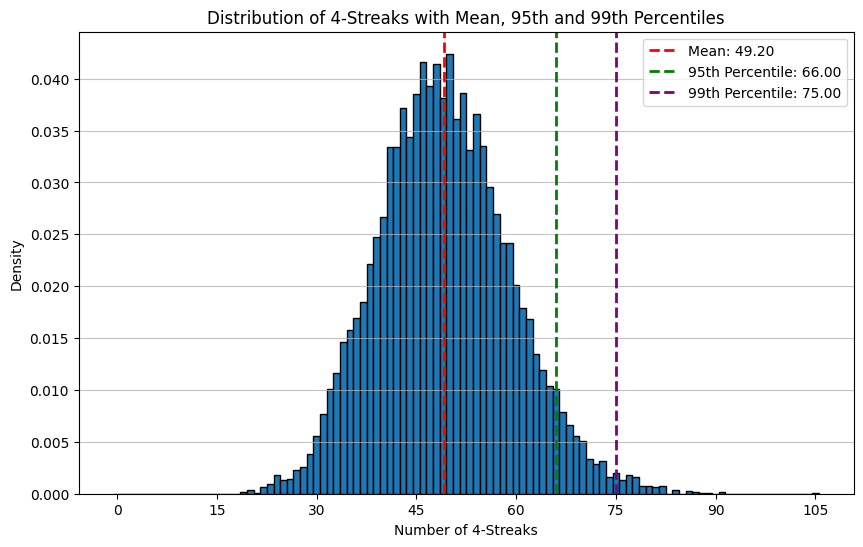

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator

# Calculate mean, 95th percentile, and 99th percentile
mean_k_streak = np.mean(k_streak)
percentile_95_k_streak = np.percentile(k_streak, 95)
percentile_99_k_streak = np.percentile(k_streak, 99)

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(k_streak, bins=range(int(max(k_streak)) + 2), edgecolor='black', align='left', density=True)

# Add vertical line for the mean
plt.axvline(mean_k_streak, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_k_streak:.2f}')

# Add vertical line for the 95th percentile (top 5%)
plt.axvline(percentile_95_k_streak, color='green', linestyle='dashed', linewidth=2, label=f'95th Percentile: {percentile_95_k_streak:.2f}')

# Add vertical line for the 99th percentile (top 1%)
plt.axvline(percentile_99_k_streak, color='purple', linestyle='dashed', linewidth=2, label=f'99th Percentile: {percentile_99_k_streak:.2f}')

plt.title('Distribution of 4-Streaks with Mean, 95th and 99th Percentiles')
plt.xlabel('Number of 4-Streaks')
plt.ylabel('Density')

# Set x-axis ticks to be more readable
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True, nbins=10)) # Adjust nbins as needed

plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()